# Lorenz63 Model

In [1]:
### MODULE IMPORT ###
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from math import *
from scipy.integrate import odeint

from mpl_toolkits.mplot3d import Axes3D


In [2]:
### DEF LORENZ63 ###
def lorenz63(state, t):
    x, y, z = state  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

In [3]:
# Jacobian of Lorenz63 System
#              dx       dy    dz
#Fx direction -sigma, sigma , 0
#Fy direction -z+rho, -1    ,  -x
#Fz direction     y , x     , -beta

def lorenz63Jacobian(state, t):

    x, y, z = state
    
    Jxx=-sigma  #Dx in x direction
    Jxy=-z+rho  #Dx in y direction
    Jxz=y       #Dx in z direction

    Jyx=sigma #Dy in x direction
    Jyy=-1
    Jyz=x
    
    Jzx=0 #Dz in x direction
    Jzy=-x
    Jzz=-beta
    
    return [[Jxx, Jyx, Jzx], [Jxy, Jyy, Jzy], [Jxz, Jyz, Jzz]]
#returns 3 vectors; derivate in x-direction, derivate in y-direction, D in z-direction

In [4]:
################################################################################################
#NEU ANFANG
# LyaPunovy "Volume" with the Lyapunov Exponents as vectors
# Define Starting Matrix Y0
y0 =  [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
#NEU ENDE
################################################################################################

In [5]:
# Y[i+1] lorenz63Jacobian matmult Y[i] # EULER Integration
# Check Volume Y[i+1]


In [6]:
### RENORMALIZATION FUNCTION ###

def renorm(tr0,tr1,td): #renormalization function
    #reads in two points tr0, tr1 and a target distance
    #returns a difference vector unpurtraj to new pertraj
    #also returns the original distance between the two points
    #new point has the same direction as the vector tr0-tr1
    #but distance to tr0 is the target distance
    
    vector = td * (tr0-tr1)/(np.linalg.norm(tr0-tr1)) #length*vector/abs(vector)
    length = np.linalg.norm(tr0-tr1)#how far these parts where appart
    
    return vector, length

In [7]:
#STARTING VALUES LORENZ63

rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0
state0 = [1.0, 1.0, 1.0] # original starting point

#perturbation = [0.1,0,0]
#state0_1 = state0.copy() + perturbation

#perturbation = 10.1
#state0_1=[2.0, 2.0,2.0]
state0_1=[1.001, 1.0,1.0]

t = np.arange(0.0,40.0,0.01)#(0.0, 40.0, 0.01)

In [8]:
#pertubation = 0.01 #0.01 #length of pertubation at the start and target distance
Tmax= 2 #50 #running time of the first plot
h = 0.005 #0.005#0.01 # Step size of the mathmatical aglorithm 
TimeOverAll = 1000#0.2#0.5#4# 40 #10000 # with q #100000 without q #is about max #50000 is to much #RunningTime of the Integration


In [9]:
### STATE LORENZ63 #odeVersion
states = odeint(lorenz63, state0, t)
states_1 = odeint(lorenz63, state0_1, t)

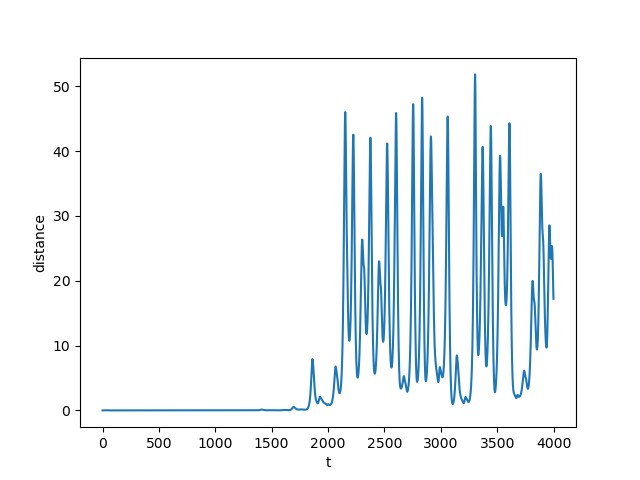

In [10]:
# LORENZ #distance between 2 perturbed trajectoris

x_0 = states[:,0]
x_1 = states_1[:,0]
y_0 = states[:,1]
y_1 = states_1[:,1]
z_0 = states[:,2]
z_1 = states_1[:,2]

plt.xlabel('t')
plt.ylabel('distance')

#plt.plot(np.linalg.norm(traj-traj_1))
plt.plot(((x_0-x_1)**2+(y_0-y_1)**2+(z_0-z_1)**2)**(1/2))

Y0 [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
Y von 0 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Volumen 1.0
y von [0.00000e+00 5.00000e-03 1.00000e-02 ... 9.99990e+02 9.99995e+02
 1.00000e+03] [[-0.4800295   0.28127511 -0.83093682]
 [-0.8736559  -0.23896341  0.42381819]
 [-0.07935399  0.92939809  0.36044714]]
Volumen 0.9999999999999996
lya 1-3 ist  0.007035927583953294 -0.008519281111193263 -0.0663138877147057
Summe 1  0.9506422218293555
Summe 2  -0.0016889706219533332
Summe 2  -14.7725747982412


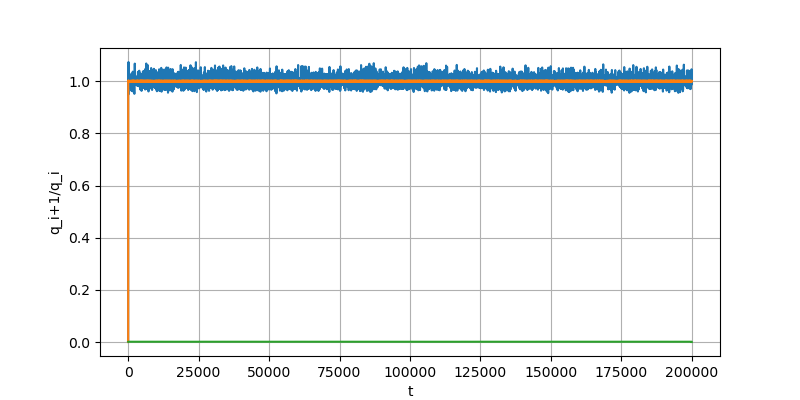

In [11]:
### lorenz63 ### CALCULATION OF STEPSIZES AND DEVELOPMENT IN TIME  ###

#plt.style.use('seaborn-poster')


# Define parameters

#function of nagumo via time
f= lambda t,states: np.array(lorenz63(states,t))
t = np.arange(0, TimeOverAll + h, h) # Numerical grid

#start values of trajectories
s0 = state0 #unpur traj start
s0_1 = state0_1 #once purturbed traj
s0_2 = state0_1 #renorm traj starts atsame point as pur traj
pur = np.linalg.norm(np.asarray(s0_1)-np.asarray(s0)) # starting pertubation distance

# Explicit Euler Method

s = np.zeros((len(t),3)) #traj of unpur state Array 2 columns, t lines
s_1 = np.zeros((len(t),3)) #traj of purstate
s_2 = np.zeros((len(t),3)) #traj of renormalized purstate

q = np.zeros(len(t))  #Euclidean unpur traj to purtraj t0-t1
qstep = np.zeros(len(t)) #Increasement of last step's Euclidean

d = np.zeros(len(t))  #Euclidean unpur - renormalied t0-t2
dstep = np.zeros(len(t)) #Increasement of last step's Euclidean renormalizeversion

pert = np.zeros(len(t)) #distance between t0 and t2 from the function

################################################################################################
#NEU ANFANG
y = np.zeros((len(t),3,3)) #3x3 Matrix for every step of t
#q = np.zeros((len(t),3,3)) #3x3 Matrix with direction 1x1x1
#r = np.zeros((len(t),3,3)) #3x3 Matrix with shape

VolLy = np.zeros(len(t)) #Volume at step no i
#NEU ENDE
################################################################################################

s[0] = s0  #initial conditions in first lines of traj-arrays
s_1[0] = s0_1
s_2[0] = s0_2

################################################################################################
#NEU ANFANG
print('Y0' , y0)
y[0]=y0
print('Y von 0', y[0])
VolLy[0] = np.linalg.norm(y[0,0]) * np.linalg.norm(y[0,1]) * np.linalg.norm(y[0,2]) #V=A*B*C at time = 0
print('Volumen',VolLy [0])

lya1 = np.zeros(len(t))
lya2 = np.zeros(len(t))
lya3 = np.zeros(len(t))

lysum = np.zeros(len(t))
#NEU ENDE
################################################################################################

for i in range(0, len(t) - 1):
    
    re=renorm(s[i],s_2[i],pur)
    pert[i]=re[1]
    
    #IF PERT BIGGER 0.00001 OR SMALLER XXX 
    s_2[i]=s[i]+re[0]         #add renormaliztion distance to origial traj to receive renormalized purtraj 
    #END IF       
                    
    s[i + 1] = s[i] + h*f(t[i], s[i]) #One Euler Step for the first traj 
    
    #perturbed traj without inferference; only starting point perturbed
    s_1[i + 1] = s_1[i] + h*f(t[i], s_1[i]) #perturbed traj    
    q[i+1] = np.linalg.norm(s[i+1] - s_1[i+1]) #calc distance between unpur traj and purtraj AT THIS STEP
    qstep[i+1] = q[i]/q[i+1] #quotient between q_i+1 and q_i
            
    #print(d[i])    
    s_2[i + 1] = s_2[i] + h*f(t[i], s_2[i]) #renorm perturbed traj    
    d[i+1] = np.linalg.norm(s[i+1] - s_2[i+1]) #calc distance to renorm traj AT THIS STEP        
    dstep[i+1] = d[i]/d[i+1] #quotient between d_i+1 and d_i
    
    ####################################################################################################
    #NEU ANFANG
    #
    y[i+1] = y[i] + h*np.matmul(lorenz63Jacobian(s[i],t),y[i])
    #print('Y zum Zeitpunkt ',i, y[i])
    
    #print('Würfelvolumen', np.linalg.norm(y[i,0]) * np.linalg.norm(y[i,1]) * np.linalg.norm(y[i,2]))
    VolLy[i+1] =  np.linalg.det(y[i]) #np.linalg.norm(y[i,0]) * np.linalg.norm(y[i,1]) * np.linalg.norm(y[i,2])
    #print('Volumen zum Zeitpunkt', i ,VolLy [i])
    Q,R=np.linalg.qr(y[i+1])
    y[i+1] = Q
    #print('R = ',np.diagonal(R))
    
    lya1[i+1],lya2[i+1],lya3[i+1]=  np.log(abs(np.diagonal(R)))
    
    #lysum[i+1] = (lya1[i+1]+lya2[i+1]+lya3[i+1])/TimeOverAll/h
    #####
    
lysum =  sum(lya1)/TimeOverAll   #(lya1[len(t)-1]+lya2[len(t)-1]+lya3[len(t)-1])/TimeOverAll    
print('y von', t ,y[i])
print('Volumen',VolLy[i])
print('lya 1-3 ist ',lya1[len(t)-1],lya2[len(t)-1],lya3[len(t)-1])
#print('Summe  ',lysum)

print('Summe 1 ',sum(lya1)/TimeOverAll)
print('Summe 2 ',sum(lya2)/TimeOverAll)
print('Summe 2 ',sum(lya3)/TimeOverAll)

# SUM lya / (len(t)-1)
#NEU ENDE
################################################################################################
#plt.figure(figsize = (12, 8))
plt.figure(figsize = (8, 4))

plt.xlabel('t')
plt.ylabel('q_i+1/q_i')
plt.plot(qstep) #draw quotient between q_i+1 and q_i
plt.plot(dstep)
plt.plot(pert)

#plt.title('PreStep for Lyapunov')
plt.grid()
plt.show()

0.950635187638144
1000.0


/tmp/ipykernel_971/3514083828.py:17: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(lya/t)


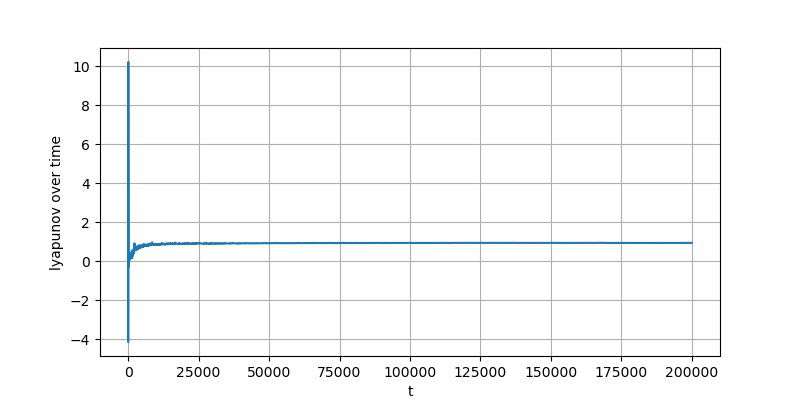

In [12]:
### lorenz63 ### CALC LYA AND DRAW LYA OVER TIME  ###

lya = np.zeros(len(t)) #empty vector


for i in range(1, len(t) - 1):
    lya[i+1]=lya[i]+np.log(pert[i]/pur)
    
print(lya[len(t)-1]/t[len(t)-1])    
print(t[len(t)-1])

#plt.figure(figsize = (12, 8))
plt.figure(figsize=(8,4))

plt.xlabel('t')
plt.ylabel('lyapunov over time')
plt.plot(lya/t)

plt.grid()
plt.show()

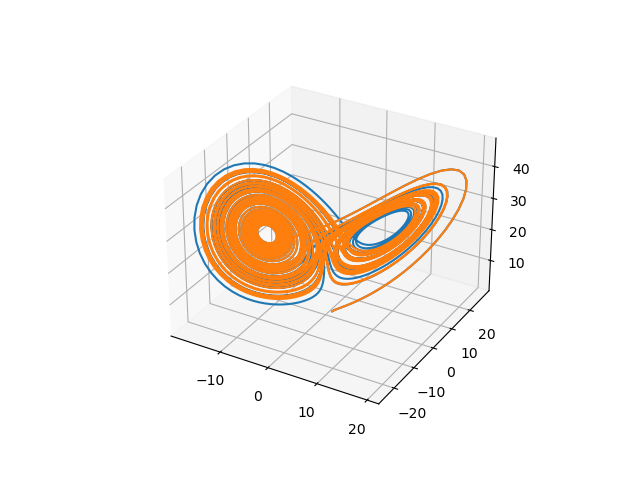

In [13]:
### PLOT LORENZ63 ###

fig = plt.figure()
#fig_1 = plt.figure()
ax = fig.add_subplot(projection='3d')

#states are the ODE calculations
ax.plot(states[:, 0], states[:, 1], states[:, 2])
ax.plot(states_1[:, 0], states_1[:, 1], states_1[:, 2])
#ax.plot(s_2[:, 0], s_2[:, 1], s_2[:, 2])


plt.draw()
plt.show()